In [2]:
from google.colab import files
uploaded = files.upload()

Saving measurements.csv to measurements.csv


In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("measurements.csv")
data.head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


Cleaning The data

In [50]:
dropped_data = data.drop(['refill liters','refill gas','specials'],axis = 1)

In [ ]:
dropped_data.info()

In [48]:
dropped_data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,"21,5",12,NaN,0,0,0
1,12.0,4.2,30,"21,5",13,NaN,0,0,0
2,11.2,5.5,38,"21,5",15,NaN,0,0,0
3,12.9,3.9,36,"21,5",14,NaN,0,0,0
4,18.5,4.5,46,"21,5",15,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,"24,5",18,NaN,0,0,0
384,16.1,4.3,38,25,31,NaN,1,0,0
385,16.0,3.8,45,25,19,NaN,0,0,0
386,15.4,4.6,42,25,31,NaN,1,0,0


In [37]:
data['distance'] = data['distance'].astype(str)


Looking at the data it has been observed that columns or parameters have values with commas in it. These are required to be replaced by dots

In [38]:
def delete_comma_and_convert_float(df,column_name):
    
    index = df.columns.get_loc(column_name)
    
    for i in range(len(df[column_name])):
        value = df.iloc[i,index]
        value_list = value.split(',')
        
        if len(value_list) == 2:
            new_value = float(''.join(value_list)) / 10
            df.iloc[i,index] = new_value
            
        else :
            df.iloc[i,index] = float (value)

In [41]:
dropped_data['distance'] = dropped_data['distance'].astype(str)
delete_comma_and_convert_float(dropped_data, 'distance')
dropped_data['distance'] = dropped_data['distance'].astype(float)
dropped_data['consume'] = dropped_data['consume'].astype(str)
delete_comma_and_convert_float(dropped_data, 'consume')
dropped_data['consume'] = dropped_data['consume'].astype(float)

In [42]:
dropped_data['gas_type'] = dropped_data['gas_type'].map({'SP98': 1, 'E10': 0})

# change 'gas_type' values to 1 and 0. String to int

Getting the data ready

In [43]:
new_df = dropped_data[['distance','speed','temp_outside','gas_type','rain','sun','consume']]
sorted_df = new_df = new_df.sort_values('consume')
dataset_x = sorted_df.drop(['consume'],axis=1)
dataset_y = sorted_df.consume.values

Spotting any correlation between the parameters

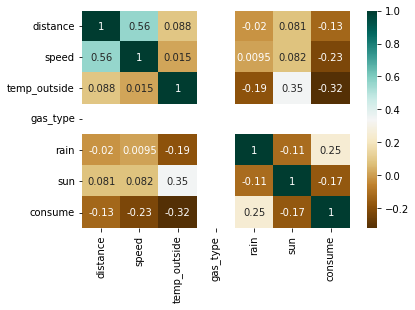

In [44]:
sns.heatmap(new_df.corr(),cmap = 'BrBG', annot=True)

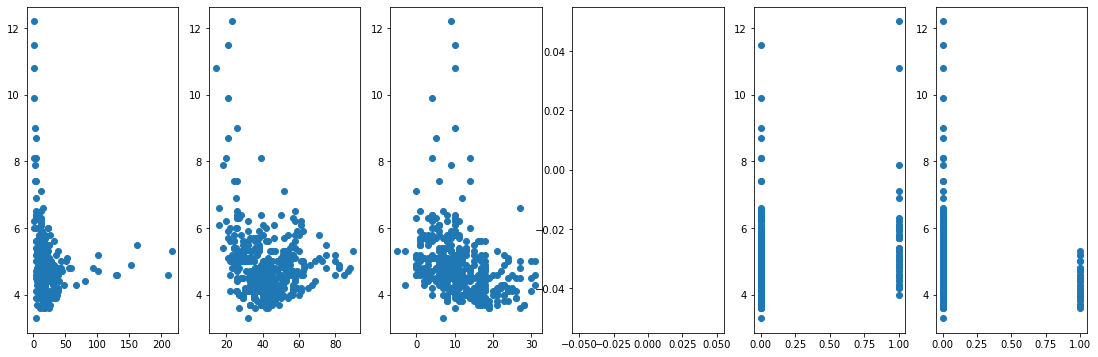

In [45]:
plt.figure(figsize=(19,6))

plt.subplot(161)
plt.scatter(dataset_x['distance'],dataset_y)
plt.subplot(162)
plt.scatter(dataset_x['speed'],dataset_y)
plt.subplot(163)
plt.scatter(dataset_x['temp_outside'],dataset_y)
plt.subplot(164)
plt.scatter(dataset_x['gas_type'],dataset_y)
plt.subplot(165)
plt.scatter(dataset_x['rain'],dataset_y)
plt.subplot(166)
plt.scatter(dataset_x['sun'],dataset_y)


plt.show()

Creating the data model

Splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size= 0.2, random_state= 42)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Model = LinearRegression()

In [ ]:
Model.fit(x_train,y_train)

In [ ]:
#To retrieve the intercept:
print(Model.intercept_)

#For retrieving the slope:
print(Model.coef_)

*Predicting Values for Train datset*

In [ ]:
y_pred = Model.predict(x_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

*The graph shows the actual values and the predicted values*

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Evaluation of the Model

In [ ]:
from sklearn import metrics


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))